# Importing Libraries

In [20]:
import os # working directory
import warnings # Ensure ignore /no warnings are displayed 
#import itertools
import numpy as np # Data Processing
import matplotlib.pyplot as plt # Visualization
import pandas as pd # Data Processing 
import statsmodels.api as sm # Forecasting
import matplotlib
from pylab import rcParams # Setting up the chart elements/visualization
from statsmodels.tsa.stattools import adfuller # Stationarity
from numpy import log # Stationarity
#!pip install pmdarima
from pmdarima.arima.utils import ndiffs # Stationarity/Differncing 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # ACF and PACF Plots
from statsmodels.tsa.arima_model import ARIMA # Applying ARIMA
import pmdarima as pm # Applying ARIMA


In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


# OBJECTIVE : FORECASTING FURNTIURE SALES FOR THE RETAIL STORE

In [3]:

df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

print(furniture['Order Date'].min())
print(furniture['Order Date'].max())

# 4 years of Data

2014-01-06 00:00:00
2017-12-30 00:00:00


In [4]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


# Data Pre-Processing

In [5]:
#Checking Missing Values
furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [60]:
#Arranging the Data chronoligcally
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [8]:
#Indexing with Time Series
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
#Work at the Average Monthly Sales
y = furniture['Sales'].resample('MS').mean()
pd.DataFrame(y)

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


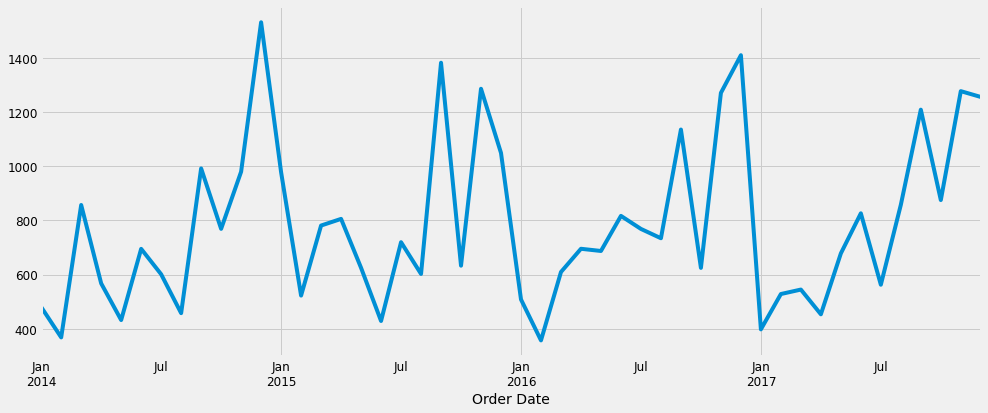

In [14]:
#Work at the Average Quarterly Sales
y_qtr = furniture['Sales'].resample('QS').mean()
y.plot(figsize=(15, 6))
plt.show()

# Decomposing the Data: Trend, Seasonal and Irregular Component 

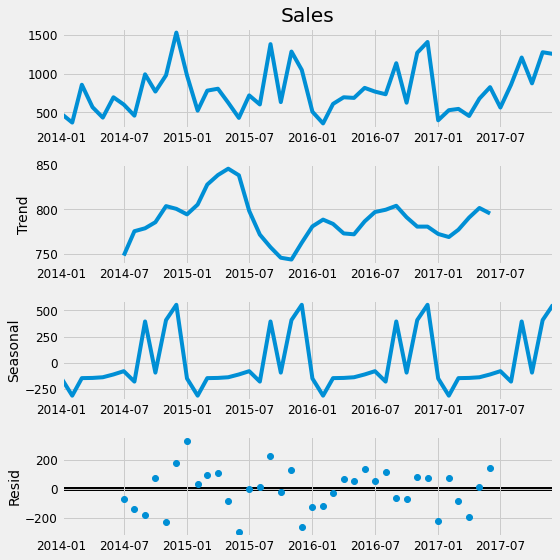

In [15]:
rcParams['figure.figsize'] = 8, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


# Checking the Stationarity of the Model

In [16]:
y_1 = y.reset_index()
#result = adfuller(y_1.Sales.dropna())
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])


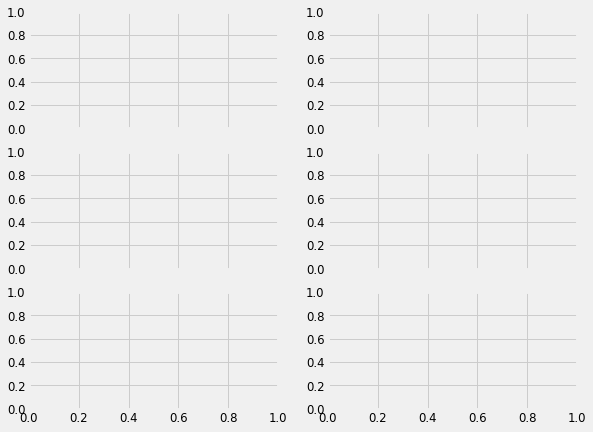

In [17]:
# More Visualization
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':70})

fig, axes = plt.subplots(3, 2, sharex=True)


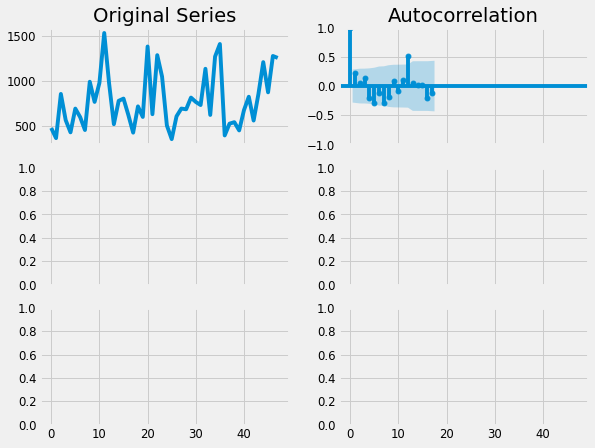

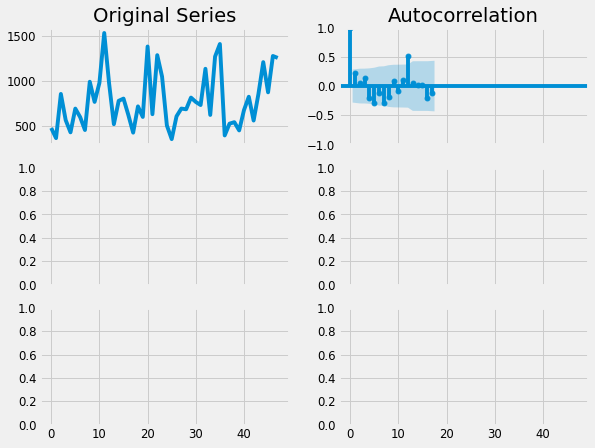

In [21]:
#Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(y_1.Sales); axes[0, 0].set_title('Original Series')
plot_acf(y_1.Sales, ax=axes[0, 1])


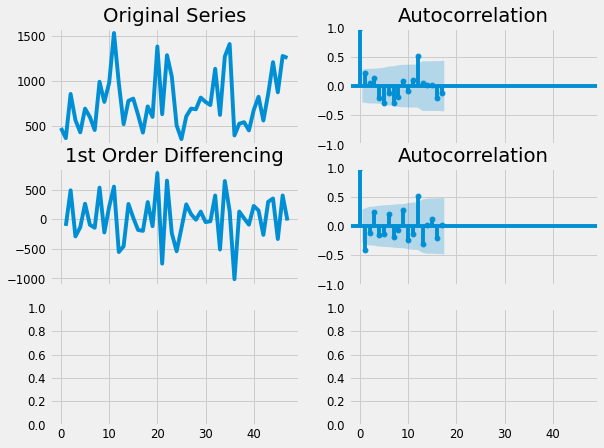

In [22]:
# 1st Differencing
axes[1, 0].plot(y_1.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_1.Sales.diff().dropna(), ax=axes[1, 1])


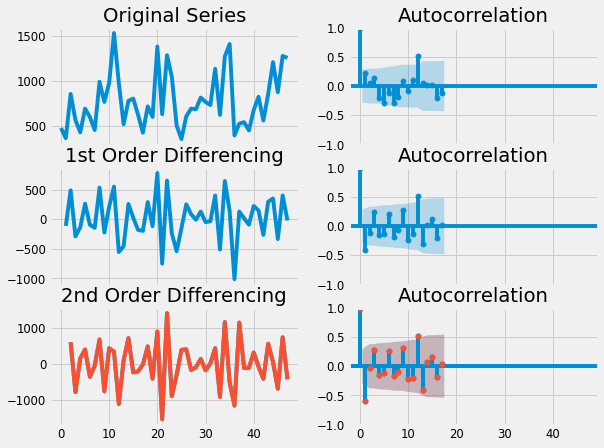

In [24]:
# 2nd Differencing
axes[2, 0].plot(y_1.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_1.Sales.diff().diff().dropna(), ax=axes[2, 1])


In [25]:
plt.show()
result_1 = adfuller(y_1.Sales.diff().dropna())
print('ADF Statistic: %f' % result_1[0])
print('p-value: %f' % result_1[1])



ADF Statistic: -6.981398
p-value: 0.000000


# Finding the AR Term of Model

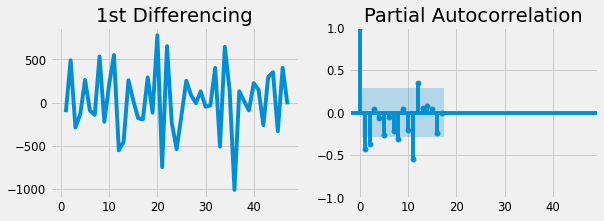

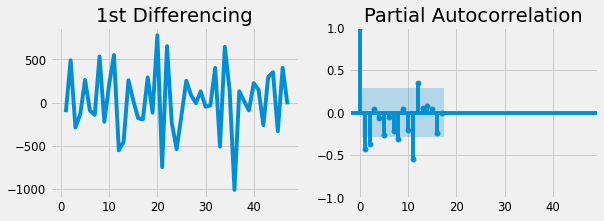

In [29]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':70})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_pacf(y_1.Sales.diff().dropna(), ax=axes[1])

#plt.show()


 # Finding the MA Term of Model

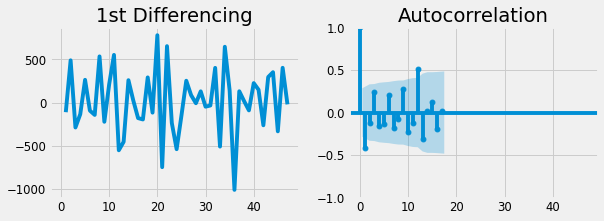

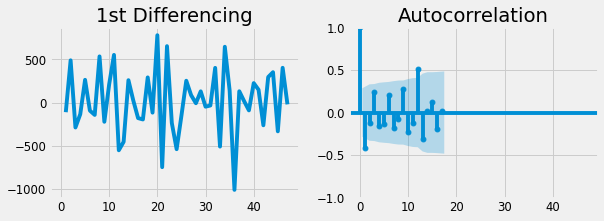

In [28]:

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(y_1.Sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(y_1.Sales.diff().dropna(), ax=axes[1])

#plt.show()


 # Fittting the SARIMA Model

In [33]:
#Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, 
#is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.


mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,# Not Enforcing Stationarity, 
                                enforce_invertibility=False)#Models do converge, Model is estimatble
results = mod.fit()
print(results.summary().tables[1])




                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.827
ma.S.L12      -0.3011      0.501     -0.601      0.548      -1.283       0.681
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


In [ ]:
#Trend Elements
#p: Trend autoregression order.
#d: Trend difference order.
#q: Trend moving average order.

#Seasonal Elements
#P: Seasonal autoregressive order.
#D: Seasonal difference order.
#Q: Seasonal moving average order.
#m: The number of time steps for a single seasonal period.


In [34]:
results.plot_diagnostics(figsize=(16, 10))
plt.show()


ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1120x700 with 0 Axes>

# Auto Arima

In [35]:
from pmdarima.arima import auto_arima

auto_mod = auto_arima(y,start_p=0,start_q=0,max_p=6,max_q=6,start_P=0,
                      start_Q=0,max_P=6,max_Q=6,m=12,seasonal =True, trace = True,n_fits=10,stepwise=True)


auto_mod.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=497.083, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=494.685, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=495.371, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=498.718, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=494.603, Time=0.35 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=492.715, Time=0.26 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=492.740, Time=0.05 sec
 ARIMA(0,0,0)(3,1,0)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=494.534, Time=0.52 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.18

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   48
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -242.915
Date:                    Thu, 11 Aug 2022   AIC                            489.831
Time:                            04:32:04   BIC                            492.998
Sample:                                 0   HQIC                           490.936
                                     - 48                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7614      0.761     -1.001      0.317      -2.253       0.730
sigma2      3.275e+04   2.45e+04      1.337      0.181   -1.53e+04    8.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.96   Prob(JB):                         0.60
Heteroskedasticity (H):               0.50   Skew:                            -0.25
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
Prediction_Auto_Arima = pd.DataFrame(auto_mod.predict(n_periods =12))

In [39]:
Prediction_Auto_Arima = pd.Series(auto_mod.predict(n_periods =12))
Prediction_Auto_Arima

0      570.832727
1      447.093333
2      676.301605
3      615.484129
4      614.152623
5      703.658199
6      655.642749
7      681.722174
8     1178.225096
9      730.566286
10    1209.933827
11    1300.554437
dtype: float64

 # Validating the Forecast

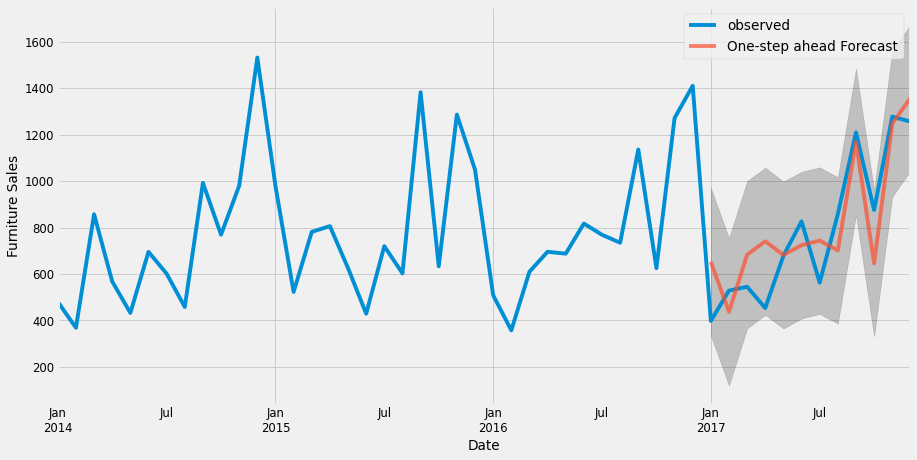

In [40]:

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()



In [41]:

y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of our forecasts is 25708.54
The Root Mean Squared Error of our forecasts is 160.34


In [56]:

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})


In [57]:
forecast_accuracy=forecast_accuracy(y_forecasted, y_truth)

In [58]:
forecast_accuracy

{'mape': 0.22797612181410223,
 'me': 26.2378001152827,
 'mae': 134.87260012556803,
 'mpe': 0.09462483082990901,
 'rmse': 160.3388309940338,
 'corr': 0.8540990969199039,
 'minmax': 0.17535088623151707}

In [49]:
#Auto_ARIMA_MAPE
y_truth_value = y_truth.values
y_auto_arima_value = Prediction_Auto_Arima.values
AM_mape = np.mean(np.abs(y_auto_arima_value  - y_truth_value)/np.abs(y_truth_value))  # MAPE


In [59]:
AM_mape

0.17352812615064794